In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
pd.__version__

'1.4.2'

In [3]:
import sklearn

In [4]:
!! pip install pyarrow

['Requirement already satisfied: pyarrow in /home/codespace/anaconda3/lib/python3.9/site-packages (20.0.0)']

In [5]:
data_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')


In [6]:
data_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [7]:
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

### Q1. Downloading the data

the data for January 2023 has 19 columns.

In [8]:
data_jan['duration'] = data_jan['tpep_dropoff_datetime'] - data_jan['tpep_pickup_datetime']


In [9]:
duration_std_sec = data_jan['duration'].dt.total_seconds().std()
duration_std_sec

2555.661074517404

### Q2. Computing duration

In [10]:
print(f"STD of the trips duration in January is {duration_std_sec/60:.2f}")

STD of the trips duration in January is 42.59


In [11]:
data_jan['duration_mins'] = data_jan['duration'].dt.total_seconds()/60

In [12]:
data_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_mins
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


<AxesSubplot:xlabel='duration_mins'>

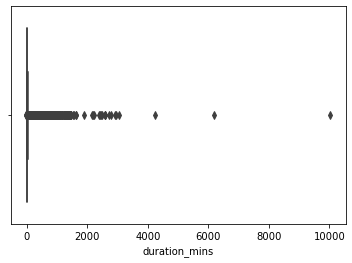

In [13]:
sns.boxplot(x=data_jan['duration_mins'])

In [14]:
records_before = len(data_jan)
print(f"Number of data before dropping out outliers: {records_before}")

Number of data before dropping out outliers: 3066766


In [15]:
# To keep only the records where the duration was between 1 and 60 minutes
lower_bound = 1 
upper_bound = 60

In [16]:
data_jan = data_jan[
    (data_jan['duration_mins'] >= lower_bound) &
    (data_jan['duration_mins'] <= upper_bound)
]


<AxesSubplot:xlabel='duration_mins'>

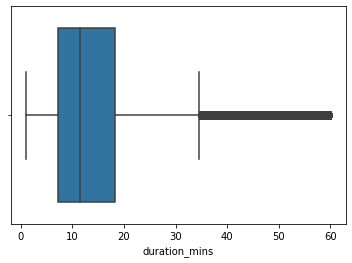

In [17]:
sns.boxplot(x=data_jan['duration_mins'])

In [18]:
records_after = len(data_jan)
print(f"Number of data after dropping out outliers: {records_after}")

Number of data after dropping out outliers: 3009173


### Q3. Dropping outliers

In [19]:
fraction_after_drop = records_after/records_before*100
print(f"The fraction of the records left after dropped the outliers: {fraction_after_drop:.2f}")

The fraction of the records left after dropped the outliers: 98.12


In [20]:
# Cast int to string
data_jan['PULocationID'] = data_jan['PULocationID'].astype(str)
data_jan['DOLocationID'] = data_jan['DOLocationID'].astype(str)


In [21]:
data_jan['PU_to_DO'] = data_jan['PULocationID']+'_'+data_jan['DOLocationID']

In [22]:
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009173 entries, 0 to 3066765
Data columns (total 22 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           object         
 8   DOLocationID           object         
 9   payment_type           int64          
 10  fare_amount            float64        
 11  extra                  float64        
 12  mta_tax                float64        
 13  tip_amount             float64        
 14  tolls_amount           float64        
 15  improvement_surcharge  float64        
 16  total_amount           float64        
 17  congestion_surcharge   float64        
 18  ai

In [23]:
data_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_mins,PU_to_DO
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333,161_141
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667,43_237
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000,48_238
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667,138_7
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333,107_79


### Q4. One-hot encoding

The dimensionality of this matrix is 515.

In [ ]:
dv = DictVectorizer()
train_dicts = data_jan[['PU_to_DO', 'duration_mins']].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [24]:
len(X_train)

3009173

### Q5. Training a model

In [25]:
X_train,X_test,y_train, y_test = train_test_split(X_encoded, y, test_size = 0.1)

In [26]:
lr = LinearRegression()

In [27]:
model = lr.fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 7.67


### Q6. Evaluating the model

In [29]:
data_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
data_feb.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [30]:
data_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913955 entries, 0 to 2913954
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [31]:
data_feb['duration'] = data_feb['tpep_dropoff_datetime'] - data_feb['tpep_pickup_datetime']
data_feb['duration_mins'] = data_feb['duration'].dt.total_seconds()/60

In [32]:
data_feb['duration_mins']

0           1.683333
1           0.233333
2           0.233333
3          32.083333
4          13.300000
             ...    
2913950    19.000000
2913951    11.133333
2913952    14.000000
2913953     7.000000
2913954     9.800000
Name: duration_mins, Length: 2913955, dtype: float64

In [ ]:
data_feb = data_feb[
    (data_feb['duration_mins'] >= lower_bound) &
    (data_feb['duration_mins'] <= upper_bound)
]


In [ ]:
# Cast int to string
data_feb['PULocationID'] = data_feb['PULocationID'].astype(str)
data_feb['DOLocationID'] = data_feb['DOLocationID'].astype(str)

X_feb = data_feb[['PULocationID','DOLocationID']]
X_encoded_feb = onehot_encoder.fit_transform(X_feb)

X_encoded_feb

In [ ]:
y_feb_test = data_feb['duration_mins']

In [ ]:
y_feb_predict = model.predict(X_encoded_feb)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_feb_test, y_feb_pred))
print(f"RMSE: {rmse:.2f}")